In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 2.6 MB/s eta 0:00:002.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 KB 4.0 MB/s eta 0:00:002.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Step 1: Data Exploration and Preprocessing

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [9]:
# Load dataset
data = pd.read_csv('/home/user/Downloads/archive/creditcard.csv')

# Checking for null values
#print(data.isnull().sum())

# Display basic statistics
#print(data.describe())

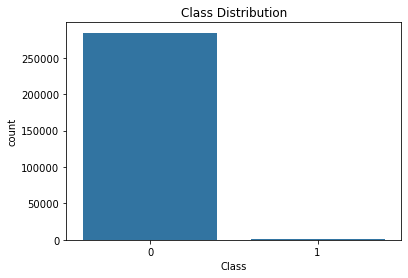

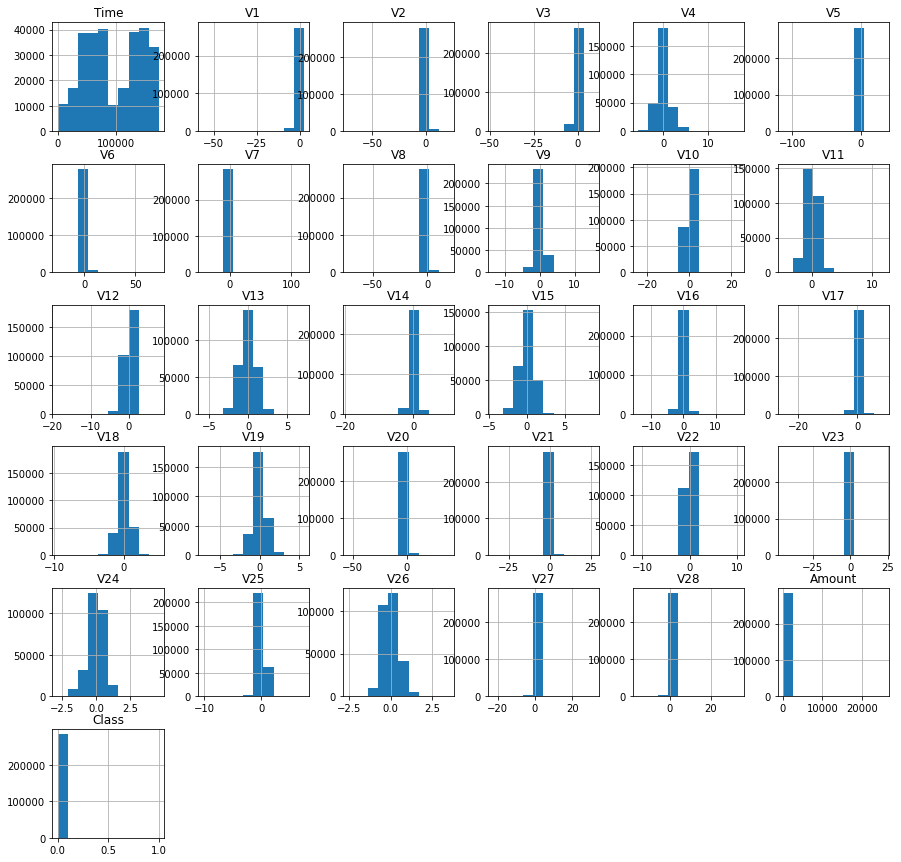

In [10]:
# Visualize class imbalance
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Visualize feature distributions
data.hist(figsize=(15, 15))
plt.show()


In [14]:
#Data Preprocessing
#1)Feature Scaling
scaler = StandardScaler()
data[['Amount']] = scaler.fit_transform(data[['Amount']])

In [15]:
#Class Imbalance Handling
X = data.drop('Class', axis=1)
y = data['Class']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# Step 2: Supervised Model Development

In [17]:
#Baseline Model - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.97      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [20]:
#XGBoost Model
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


/home/user/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



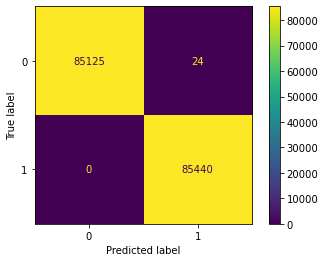

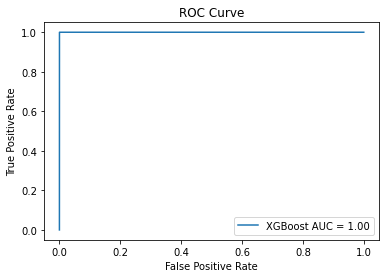

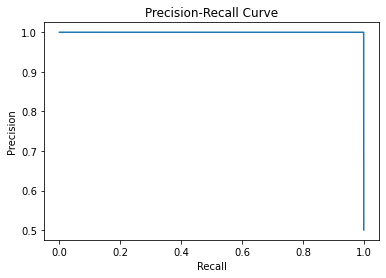

In [21]:
#Performance Evaluation for Supervised Models
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'XGBoost AUC = {roc_auc_score(y_test, y_pred_xgb):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Step 3: Unsupervised Model Development

In [22]:
#Isolation Forest
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X)

# Predict anomalies
anomaly_score = iso_forest.decision_function(X)
anomalies = iso_forest.predict(X)
print("Anomalies Detected: ", np.sum(anomalies == -1))


Anomalies Detected:  285


In [23]:
#Autoencoder 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Autoencoder
autoencoder = Sequential([
    Dense(15, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(7, activation='relu'),
    Dense(15, activation='relu'),
    Dense(X_train.shape[1], activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate reconstruction error
reconstructions = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(reconstructions - X_test), axis=1)
threshold = np.percentile(reconstruction_errors, 95)  # Set threshold
pred_anomalies = reconstruction_errors > threshold
print("Autoencoder Anomalies Detected: ", np.sum(pred_anomalies))


2024-11-12 15:26:23.114388: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 15:26:23.261523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 15:26:23.319134: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 15:26:23.336106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 15:26:23.442903: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11195/11195 ━━━━━━━━━━━━━━━━━━━━ 7s 562us/step - loss: 15516010.0000 - val_loss: 107.8610
Epoch 2/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 6s 546us/step - loss: 385.6177 - val_loss: 13.9286
Epoch 3/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 6s 559us/step - loss: 365.7776 - val_loss: 84.5098
Epoch 4/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 6s 564us/step - loss: 338.6290 - val_loss: 12.8158
Epoch 5/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 6s 552us/step - loss: 299.2458 - val_loss: 6.4195
Epoch 6/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 6s 556us/step - loss: 255.3979 - val_loss: 22.5613
Epoch 7/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 7s 667us/step - loss: 480.2230 - val_loss: 12.0490
Epoch 8/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 8s 685us/step - loss: 192.4942 - val_loss: 236.5130
Epoch 9/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 7s 666us/step - loss: 238.0281 - val_loss: 11.7539
Epoch 10/10
11195/11195 ━━━━━━━━━━━━━━━━━━━━ 7s 650us/step - loss: 280.3820 - val_loss: 15.8707
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 2s 447us/step
Autoencod

# Step 4: Model Evaluation

In [24]:
# XGBoost evaluation
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score: ", roc_auc_score(y_test, y_pred_xgb))

# Isolation Forest - Compare anomalies with actual fraud
actual_fraud = data[data['Class'] == 1]
predicted_fraud = data[anomalies == -1]
print("Isolation Forest Fraud Detection Rate: ", len(set(actual_fraud.index).intersection(set(predicted_fraud.index))) / len(actual_fraud))


XGBoost Confusion Matrix:
 [[85125    24]
 [    0 85440]]
XGBoost ROC-AUC Score:  0.9998590705704118
Isolation Forest Fraud Detection Rate:  0.16869918699186992


# Step 5: Explainability

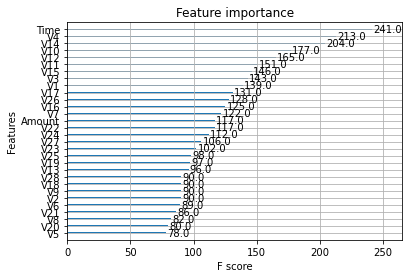

In [25]:
#Feature Importance with XGBoost
from xgboost import plot_importance

# Feature importance plot for XGBoost
plot_importance(xgb_model)
plt.show()


100%|===================| 170405/170589 [10:03<00:00]        

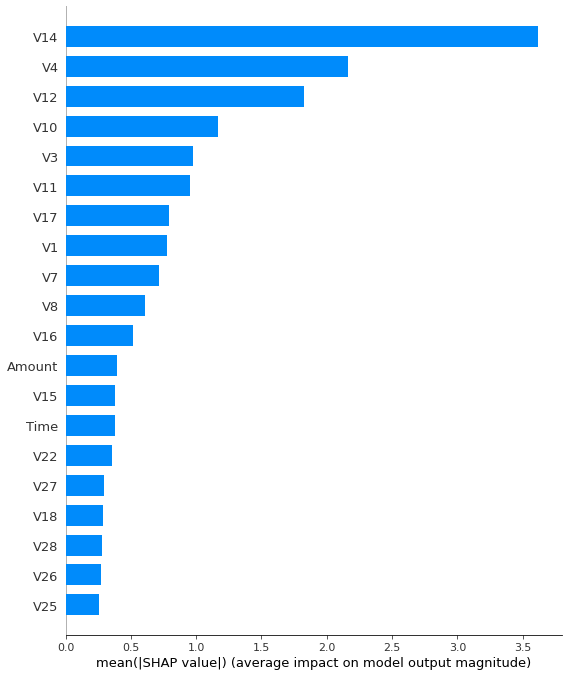

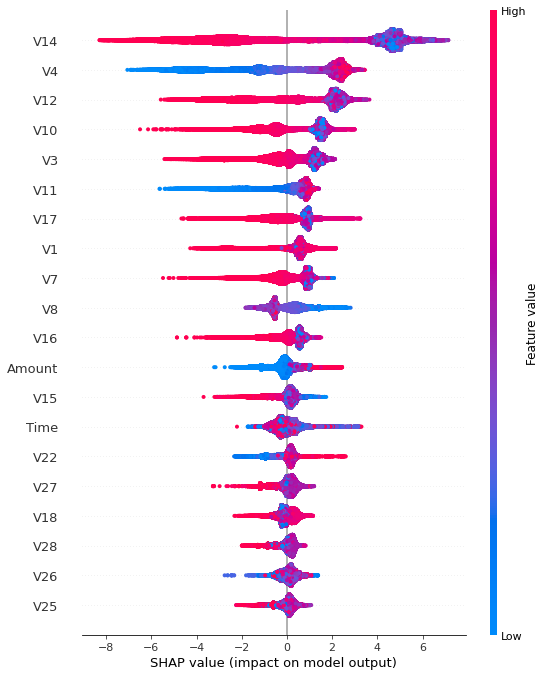

In [28]:
#SHAP for Model Interpretability
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
